In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


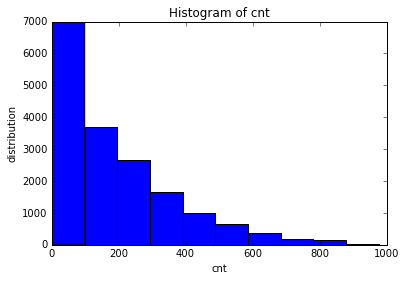

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel('cnt')
plt.ylabel('distribution')
plt.title('Histogram of cnt')
plt.hist(bike_rentals["cnt"])
plt.show()

In [69]:
bike_correlation = bike_rentals.corr()['cnt']
bike_correlation

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

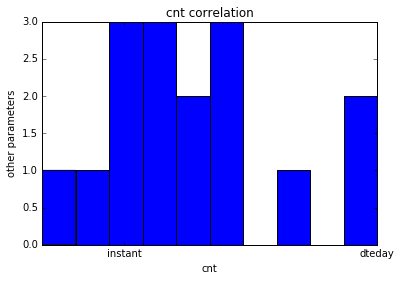

In [116]:
# plt.xlabel('cnt')
# plt.ylabel('other parameters')
# plt.title('cnt correlation')

# # plt.xticks(np.arange(len(bike_rentals.columns)), list(bike_rentals.columns))
# plt.xticks(np.arange(len(bike_rentals.columns)), list(bike_rentals.columns))

# plt.hist(bike_correlation)
# plt.show()

In [104]:
## VISUALISE

# plt.xlabel('cnt')
# plt.ylabel('other parameters')
# plt.title('cnt correlation')

# labels =bike_correlation[0]
# values = bike_correlation[1]
# indexes = np.arange(len(bike_rentals.columns))
# width = 1

# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)

# plt.show()


# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

# correlations = bike_correlations
# # plot correlation matrix
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = numpy.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
# plt.show()


In [111]:
def assign_label(hour):
    if 6 <= hour and hour < 12:
        return 1
    elif 12 <= hour and hour < 18:
        return 2
    elif 18 <= hour and hour < 24:
        return 3
    elif 0 <= hour and hour < 6:
        return 4
bike_rentals["time_label"] = bike_rentals['hr'].apply(assign_label)

In [112]:
train = bike_rentals.sample(frac=.8)

In [114]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# Linear Regression



We'll need to ignore the **`"registered"`** **`"casual"`** and **`"registered"`** columns because **`"cnt"`** is derived from them.
If we're trying to predict the number of people who rent bikes in a given hour (**`cnt`**), it doesn't make sense to already know casual or registered, because those numbers are added together to get cnt.



In [121]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])

#### Error metric
The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

In [122]:
np.mean((predictions - test["cnt"]) ** 2)

17844.317027732253

#### Error
The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [129]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

2863.3103788347667

In [130]:
reg = DecisionTreeRegressor(min_samples_leaf=2)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

3124.3102864083876

#### Decision tree error
By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [132]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])
predictions = reg.predict(test[predictors])
numpy.mean((predictions - test["cnt"]) ** 2)

2046.9836665137086

What we could do  
Calculate additional features, such as:  
An index combining temperature, humidity, and wind speed  
Try predicting casual and registered instead of cnt.  